In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%pip install -U kaleido
import kaleido
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Note: you may need to restart the kernel to use updated packages.


# Data Exploration


In [142]:
credit_cards = pd.read_csv("creditcard.csv") #read dataset
credit_cards.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [143]:
credit_cards.shape # lets see the dimensions of the data -> data shape

(284807, 31)

In [144]:
credit_cards.columns # lets see the columns of the data -> data features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [145]:
#display all the cedit_cards data info
credit_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [146]:
credit_cards[['Amount', 'Time']].describe()
# mean, count, avg, max, min , and standard deviation of the dataset.

,Amount,Time
count,284807.00,284807.00
mean,88.35,94813.86
std,250.12,47488.15
min,0.00,0.00
25%,5.60,54201.50
50%,22.00,84692.00
75%,77.16,139320.50
max,25691.16,172792.00


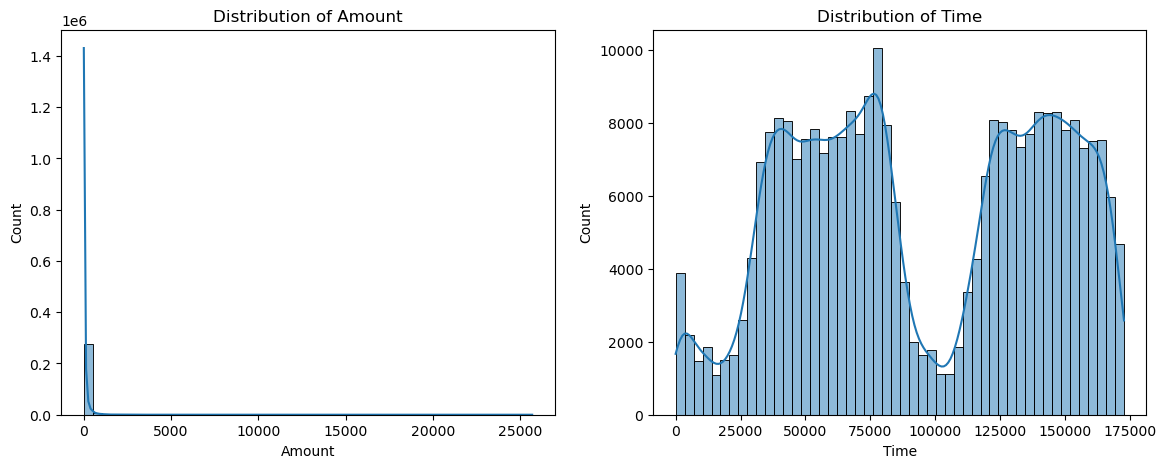

In [149]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(credit_cards['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')

plt.subplot(1,2,2)
sns.histplot(credit_cards['Time'], bins=50, kde=True)
plt.title('Distribution of Time')

plt.show()


 # Preprocessing

In [150]:
from sklearn.preprocessing import MinMaxScaler
X = credit_cards.drop('Class', axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = credit_cards['Class']

X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.00,0.94,0.77,0.88,0.31,0.76,0.27,0.27,0.79,0.48,...,0.58,0.56,0.52,0.66,0.39,0.59,0.39,0.42,0.31,0.01
1,0.00,0.98,0.77,0.84,0.27,0.77,0.26,0.26,0.79,0.45,...,0.58,0.56,0.48,0.67,0.34,0.59,0.45,0.42,0.31,0.00
2,0.00,0.94,0.75,0.87,0.27,0.76,0.28,0.27,0.79,0.41,...,0.59,0.57,0.55,0.68,0.29,0.56,0.40,0.42,0.31,0.01
3,0.00,0.94,0.77,0.87,0.21,0.77,0.28,0.27,0.79,0.41,...,0.58,0.56,0.51,0.66,0.22,0.61,0.39,0.42,0.31,0.00
4,0.00,0.94,0.78,0.86,0.27,0.76,0.26,0.27,0.78,0.49,...,0.58,0.56,0.55,0.66,0.40,0.57,0.51,0.42,0.32,0.00


In [147]:
from sklearn.preprocessing import StandardScaler
X = credit_cards.drop('Class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


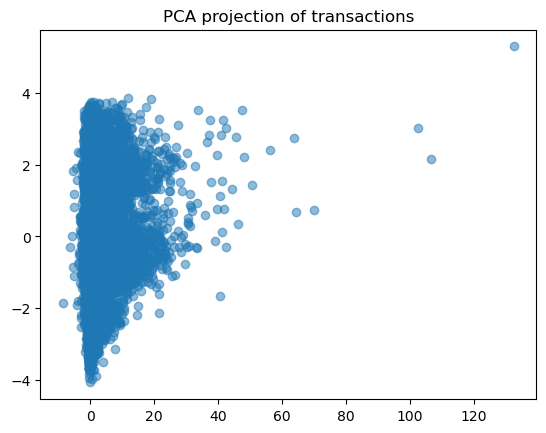

In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title('PCA projection of transactions')
plt.show()

# Unsupervised Techniques

In [154]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

#Isolation Forest
iso = IsolationForest(
    n_estimators=100,   
    contamination=0.0017,
    random_state=42)
iso.fit(X_scaled)
y_pred_iso = iso.predict(X_scaled)  
y_pred_iso = np.where(y_pred_iso == -1, 1, 0) 


In [155]:
#One-Class SVM
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu=0.0017, kernel='rbf', gamma=0.01)
y_pred_svm = ocsvm.fit_predict(X_scaled)
y_pred_svm = [1 if i == -1 else 0 for i in y_pred_svm]

# Evaluation

In [157]:
from sklearn.metrics import classification_report, confusion_matrix
y = credit_cards['Class']
print("Isolation Forest:")
print(confusion_matrix(y, y_pred_iso))
print(classification_report(y, y_pred_iso))


Isolation Forest:
[[283955    360]
 [   367    125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



In [158]:
print("One-Class SVM:")
print(confusion_matrix(y, y_pred_svm))
print(classification_report(y, y_pred_svm))

One-Class SVM:
[[283951    364]
 [   373    119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.25      0.24      0.24       492

    accuracy                           1.00    284807
   macro avg       0.62      0.62      0.62    284807
weighted avg       1.00      1.00      1.00    284807



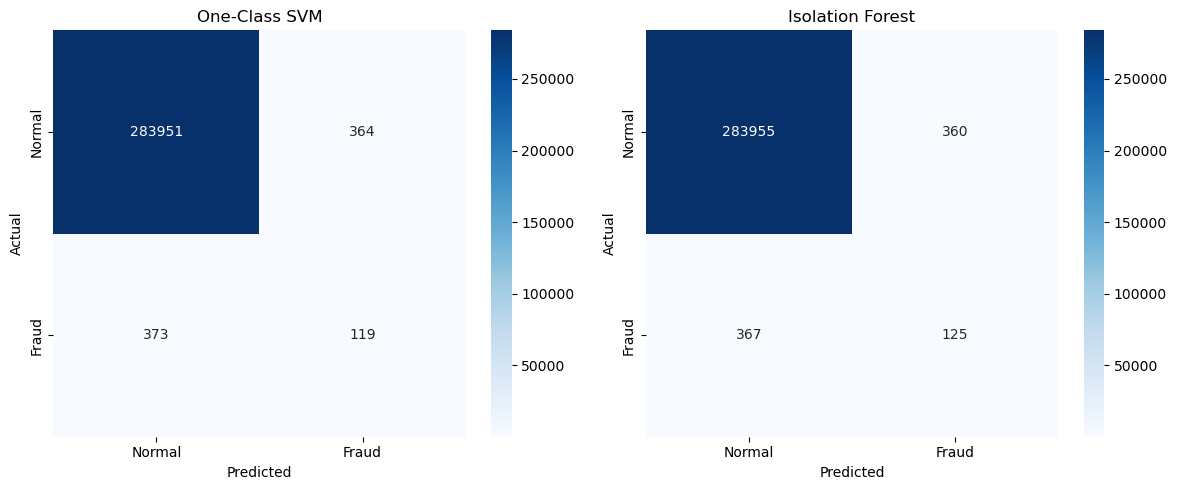

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusions_side_by_side(y_true, y_pred1, y_pred2, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12,5)) 
    
    cm1 = confusion_matrix(y_true, y_pred1)
    sns.heatmap(cm1, annot=True, fmt='d', cmap="Blues",
                xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'],
                ax=axes[0])
    axes[0].set_title(titles[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    
    cm2 = confusion_matrix(y_true, y_pred2)
    sns.heatmap(cm2, annot=True, fmt='d', cmap="Blues",
                xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'],
                ax=axes[1])
    axes[1].set_title(titles[1])
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

plot_confusions_side_by_side(
    y_true=y, 
    y_pred1=y_pred_svm, 
    y_pred2=y_pred_iso, 
    titles=["One-Class SVM", "Isolation Forest"]
)


In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = credit_cards.drop('Class', axis=1)
y = credit_cards['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

📊 Model Comparison:

              Model  Accuracy  Precision  Recall  F1-Score
0     One-Class SVM      0.95       0.02    0.70      0.05
1  Isolation Forest      1.00       0.39    0.26      0.31


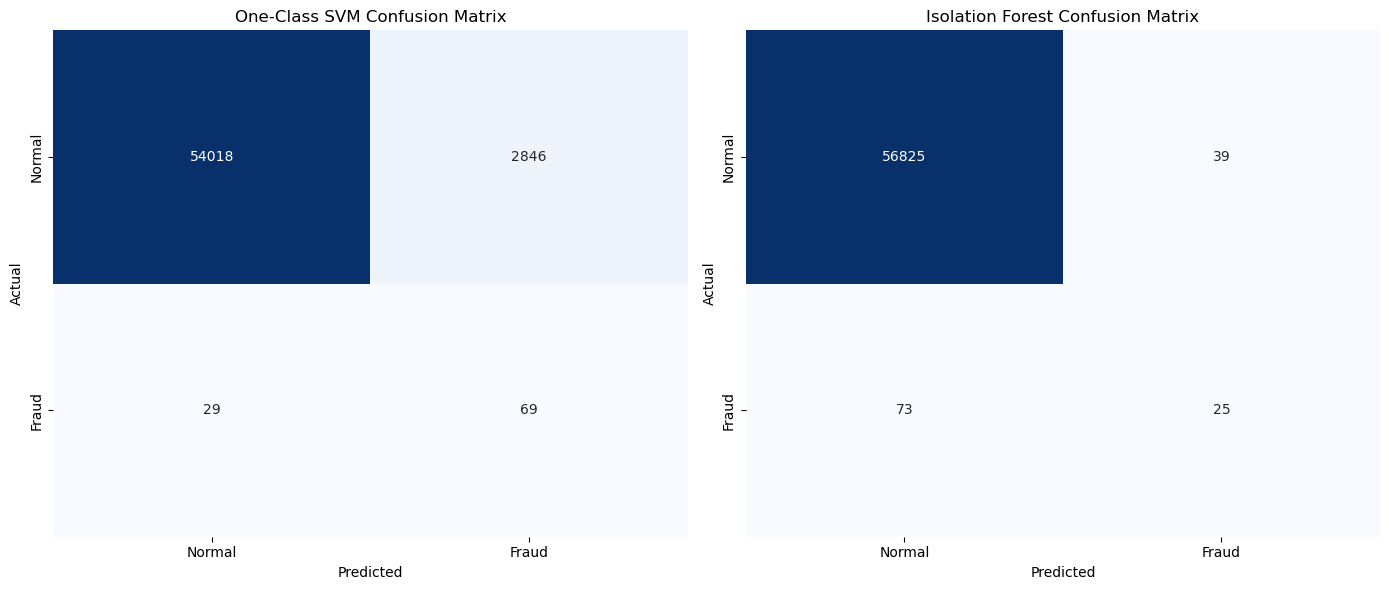

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
y_pred_svm = ocsvm.fit(X_train).predict(X_test)
y_pred_svm = [1 if p == -1 else 0 for p in y_pred_svm]

# Isolation Forest
iforest = IsolationForest(contamination=0.001, random_state=42)
y_pred_iso = iforest.fit(X_train).predict(X_test)
y_pred_iso = [1 if p == -1 else 0 for p in y_pred_iso] 

models = {
    "One-Class SVM": y_pred_svm,
    "Isolation Forest": y_pred_iso,
}

results = []
for name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-Score": round(f1, 4)
    })

results_df = pd.DataFrame(results)
print("📊 Model Comparison:\n")
print(results_df)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # wider than tall for side-by-side

for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False,
                xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()